# Nhóm TN
- `Vũ Công Thắng - 22521342`
- `Lê Cao Nguyên - 22520970`

---

# Tabels contents

1. Kết nối với Drive
2. Chia dữ liệu sử dụng `StratifiedKFold`
3. Thống kê dữ liệu
4. Trực quan hóa dữ liệu


# Kết nối với Drive

In [1]:
root_dir = '/kaggle/input/car-cs114/dataset'
original_labels = ["Honda", "Others", "VinFast", "KIA", "Hyundai", "Toyota", "Suzuki", "Mitsubishi", "Mazda"]



# Chia dữ liệu sử dụng StratifiedKFold
1. Đọc folder `Public`
 - Đọc các tệp hình ảnh từ các thư mục tương ứng với nhãn.
 - Sắp xếp các nhãn ban đầu thành một danh sách được sắp xếp hợp lý.
 - Tạo `all_data` có columns = [path, label].

In [2]:
import os
import glob
import csv
from sklearn.model_selection import train_test_split

def read_file(root_dir, original_labels):
    sorted_labels = ["Others"] + sorted([label for label in original_labels if label != "Others"])
    categories = {label: idx for idx, label in enumerate(sorted_labels)}
    #0: Others, 1: Honda, 2: Hyundai, 3: KIA, 4: Mazda, 5: Mitsubishi, 6: Suzuki, 7: Toyota, 8: VinFast
    all_data = []

    for name, id in categories.items():
        car_path = os.path.join(root_dir, name)
        os.makedirs(car_path, exist_ok=True)  # Đảm bảo thư mục đã tồn tại

        for image_path in glob.glob(os.path.join(car_path, "*.jpg")):
            all_data.append((image_path, id))  # Lưu trữ (đường dẫn, nhãn)

    return all_data

all_data = read_file(root_dir=root_dir, original_labels=original_labels)


2. Lưu trữ vào CSV
 - Sử dụng hàm `save_to_csv()` để lưu dữ liệu vào tệp CSV.

In [3]:
def save_to_csv(data, file_path):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['path', 'label'])  # Ghi tiêu đề cột
        for row in data:
            writer.writerow(row)  # Ghi dữ liệu vào file

save_to_csv(all_data, 'CarDataset.csv')


3. Sử dụng StratifiedKFold
 - Phân chia dữ liệu thành các tập train và test với 5 split.
 - Lưu vào các tệp CSV riêng biệt.

In [4]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def read_csv(file_path):
    df = pd.read_csv(file_path)
    return df

df = read_csv('CarDataset.csv')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(df, df['label']), start=1):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

    train_filename = f'CarDataset-Splits-{fold}-Train.csv'

    test_filename = f'CarDataset-Splits-{fold}-Test.csv'

    train_df.to_csv(train_filename, index=False)
    test_df.to_csv(test_filename, index=False)

    print(f'Split-{fold}: Train: {train_filename}, Test: {test_filename}')


Split-1: Train: CarDataset-Splits-1-Train.csv, Test: CarDataset-Splits-1-Test.csv
Split-2: Train: CarDataset-Splits-2-Train.csv, Test: CarDataset-Splits-2-Test.csv
Split-3: Train: CarDataset-Splits-3-Train.csv, Test: CarDataset-Splits-3-Test.csv
Split-4: Train: CarDataset-Splits-4-Train.csv, Test: CarDataset-Splits-4-Test.csv
Split-5: Train: CarDataset-Splits-5-Train.csv, Test: CarDataset-Splits-5-Test.csv


# Thống kê dữ liệu

In [5]:
import pandas as pd

def summarize_data(split_number):
    # Đọc tập tin Train
    train_filename = f'CarDataset-Splits-{split_number}-Train.csv'
    train_df = pd.read_csv(train_filename)

    # Đọc tập tin Test
    test_filename = f'CarDataset-Splits-{split_number}-Test.csv'
    test_df = pd.read_csv(test_filename)

    # Thống kê số lượng ảnh theo labels
    train_counts = train_df['label'].value_counts()
    test_counts = test_df['label'].value_counts()

    print(f'Split-{split_number} Train:')
    print(train_counts)

    print(f'Split-{split_number} Test:')
    print(test_counts)
    print('---' * 10)

# Gọi hàm cho từng split từ 1 đến 5
for i in range(1, 6):
    summarize_data(i)


Split-1 Train:
label
6    5241
7    4615
0    3651
2    2739
3    2550
4    2535
1    2500
5    2288
8    2250
Name: count, dtype: int64
Split-1 Test:
label
6    1311
7    1153
0     913
2     685
3     637
4     634
1     625
5     572
8     563
Name: count, dtype: int64
------------------------------
Split-2 Train:
label
6    5242
7    4614
0    3651
2    2739
3    2550
4    2535
1    2500
5    2288
8    2250
Name: count, dtype: int64
Split-2 Test:
label
6    1310
7    1154
0     913
2     685
3     637
4     634
1     625
5     572
8     563
Name: count, dtype: int64
------------------------------
Split-3 Train:
label
6    5242
7    4614
0    3651
2    2739
3    2550
4    2535
1    2500
5    2288
8    2251
Name: count, dtype: int64
Split-3 Test:
label
6    1310
7    1154
0     913
2     685
3     637
4     634
1     625
5     572
8     562
Name: count, dtype: int64
------------------------------
Split-4 Train:
label
6    5242
7    4614
0    3651
2    2740
3    2549
4    2535
1    25

# Trực quan hóa dữ liệu
 - Sử dụng `Viz_data()` với `random_state = 4` để hiển thị các ảnh từ dữ liệu training của mỗi split.

In [6]:
NumImgsPerRow = 10
ImgHeight = ImgWidth = 150

Error loading image: /kaggle/input/car-cs114/dataset/Mitsubishi/22521463-22521213-22521259.Mitsubishi.76.jpg, cannot identify image file '/kaggle/input/car-cs114/dataset/Mitsubishi/22521463-22521213-22521259.Mitsubishi.76.jpg'


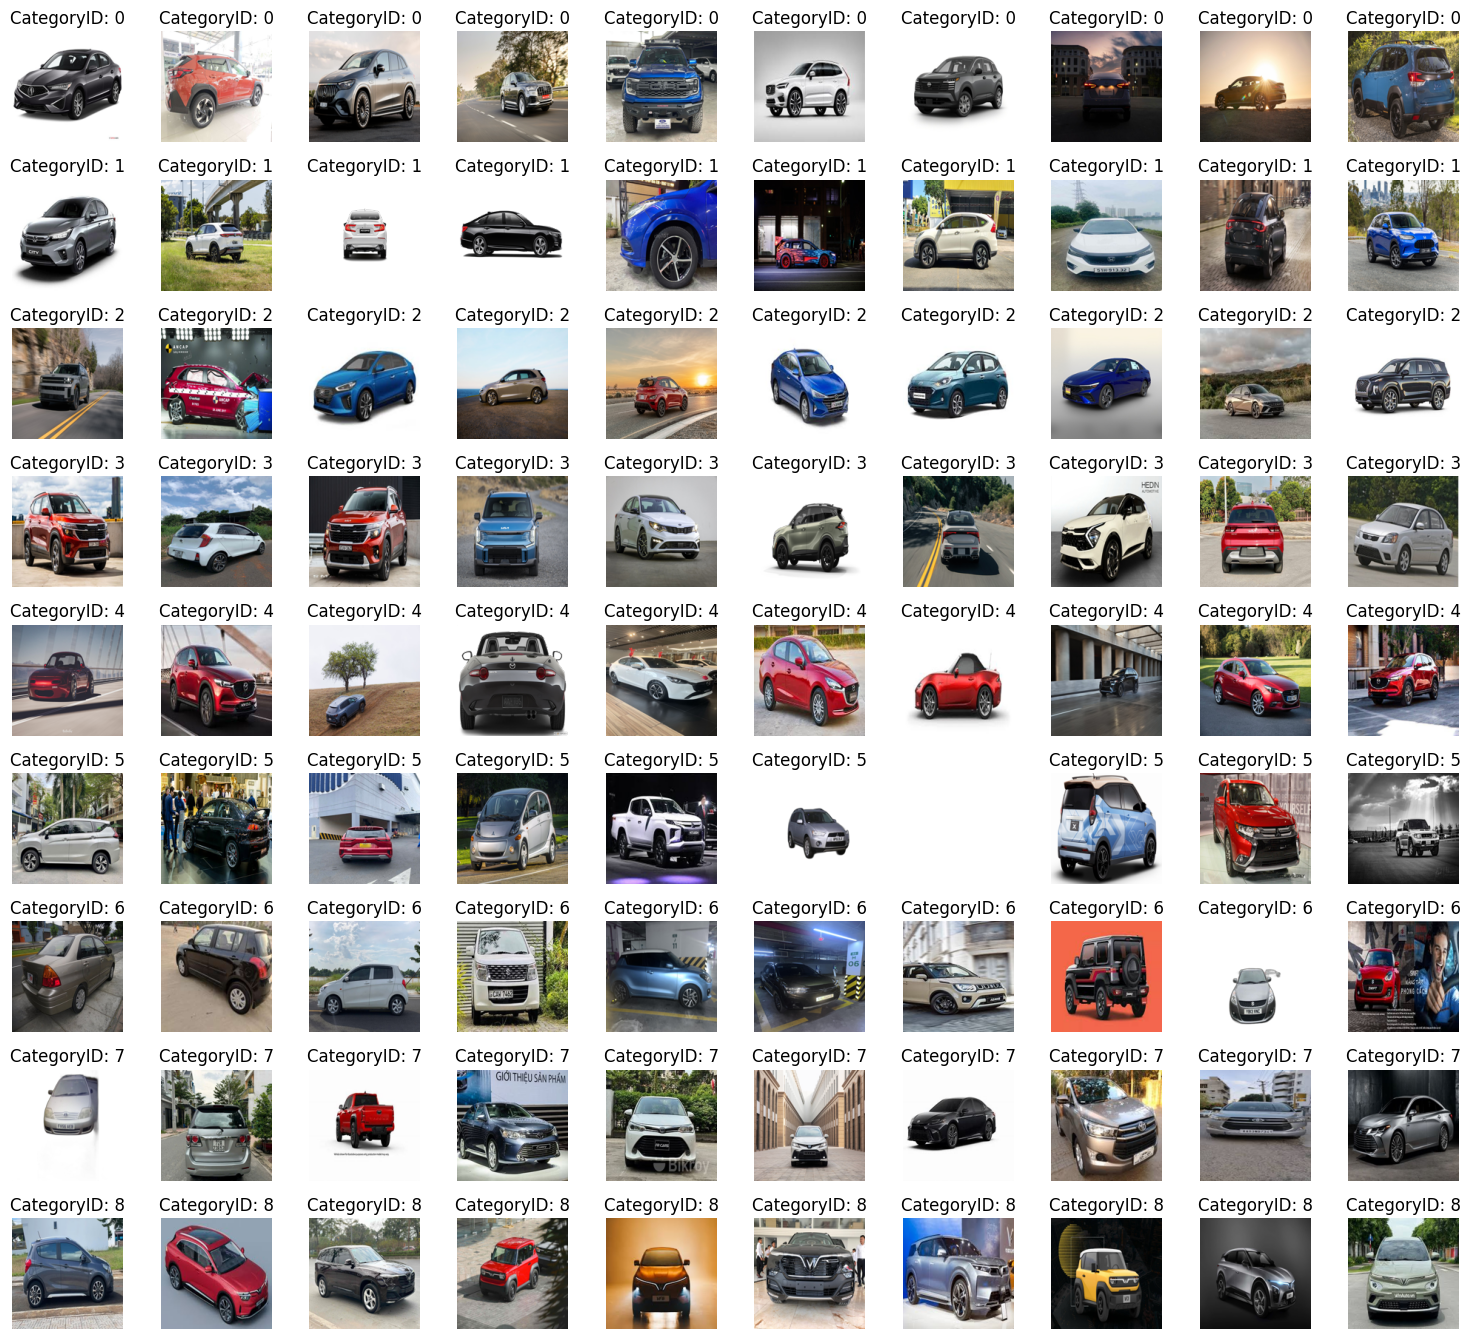

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

def Viz_data(path):
    df = pd.read_csv(path)
    grouped = df.groupby('label')

    NumImgsPerRow = 10
    ImgHeight = ImgWidth = 150

    fig, axes = plt.subplots(nrows=len(grouped), ncols=NumImgsPerRow, figsize=(NumImgsPerRow * 1.5, len(grouped) * 1.5))

    if len(grouped) > 1:
        for idx, (label, group) in enumerate(grouped):
            # Chọn ngẫu nhiên ảnh từ mỗi nhóm
            sample_images = group.sample(n=NumImgsPerRow, random_state=42).reset_index(drop=True)

            for j, (index, row) in enumerate(sample_images.iterrows()):
                img_path = row['path']
                try:
                    img = Image.open(img_path).resize((ImgWidth, ImgHeight))
                    ax = axes[idx, j]
                    ax.imshow(img)
                    ax.set_title(f'CategoryID: {label}')
                    ax.axis('off')
                except Exception as e:
                    print(f"Error loading image: {img_path}, {e}")
                    # Ẩn các ô bị lỗi
                    ax = axes[idx, j]
                    ax.axis('off')

    plt.tight_layout()
    plt.show()

Viz_data('/kaggle/working/CarDataset-Splits-1-Test.csv')


# Classification

In [8]:
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Hàm xây dựng mô hình CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Hàm load dữ liệu (tương tự như trước)
def load_data(df, input_shape=(128, 128), num_classes=9):
    images = []
    labels = []
    for index, row in df.iterrows():
        img_path = row['path']
        try:
            img = image.load_img(img_path, target_size=input_shape)
            img_array = image.img_to_array(img) / 255.0  # Chuẩn hóa về [0, 1]
            images.append(img_array)
            labels.append(row['label'])
        except Exception as e:
            continue
    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=num_classes)  # One-hot encoding
    return images, labels


In [9]:
def build_model(input_shape, num_classes):
    # Tải mô hình MobileNet pre-trained
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Thêm các lớp cuối để phù hợp với bài toán của bạn
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    # Thêm các lớp Dense và Dropout
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)  # Dropout 30%
    
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)  # Dropout 30%
    
    x = Dense(64, activation='relu')(x)
    
    # Lớp đầu ra
    x = Dense(num_classes, activation='softmax')(x)

    # Tạo mô hình hoàn chỉnh
    model = Model(inputs=base_model.input, outputs=x)

    # Đóng băng các lớp trong MobileNet (trong giai đoạn đầu để fine-tune)
    for layer in base_model.layers:
        layer.trainable = False

    # Compile mô hình
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [10]:
# Tạo danh sách các file Train và Test
train_files = [f'/kaggle/working/CarDataset-Splits-{i}-Train.csv' for i in range(1, 6)]
test_files = [f'/kaggle/working/CarDataset-Splits-{i}-Test.csv' for i in range(1, 6)]

# Huấn luyện và kiểm tra từng split
results = []
for train_file, test_file in zip(train_files, test_files):
    print(f"Training with {train_file} and testing with {test_file}")
    
    # Load dữ liệu Train
    train_df = pd.read_csv(train_file)
    X_train, y_train = load_data(train_df, input_shape=(128, 128))
    
    # Load dữ liệu Test
    test_df = pd.read_csv(test_file)
    X_test, y_test = load_data(test_df, input_shape=(128, 128))
    
    # Xây dựng mô hình mới
    model = build_model(input_shape=(128, 128, 3), num_classes=9)
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
    
    # Đánh giá trên dữ liệu Test
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Split: {train_file}, Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
    
    # Lưu kết quả
    results.append({
        'split': train_file,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    })

Training with /kaggle/working/CarDataset-Splits-1-Train.csv and testing with /kaggle/working/CarDataset-Splits-1-Test.csv


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2370 - loss: 2.0690
Epoch 2/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3695 - loss: 1.7650
Epoch 3/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4230 - loss: 1.6429
Epoch 4/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4471 - loss: 1.5773
Epoch 5/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4741 - loss: 1.5052
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4289 - loss: 1.6090
Split: /kaggle/working/CarDataset-Splits-1-Train.csv, Test Loss: 1.4993644952774048, Test Accuracy: 0.48228150606155396
Training with /kaggle/working/CarDataset-Splits-2-Train.csv and testing with /kaggle/working/CarDataset-Splits-2-Test.csv


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.2585 - loss: 2.0265
Epoch 2/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3778 - loss: 1.7455
Epoch 3/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4248 - loss: 1.6361
Epoch 4/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4534 - loss: 1.5514
Epoch 5/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4810 - loss: 1.4732
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4003 - loss: 1.6245
Split: /kaggle/working/CarDataset-Splits-2-Train.csv, Test Loss: 1.4955520629882812, Test Accuracy: 0.4824276566505432
Training with /kaggle/working/CarDataset-Splits-3-Train.csv and testing with /kaggle/working/CarDataset-Splits-3-Test.csv


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.2554 - loss: 2.0367
Epoch 2/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3681 - loss: 1.7656
Epoch 3/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4162 - loss: 1.6442
Epoch 4/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4513 - loss: 1.5592
Epoch 5/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4776 - loss: 1.4928
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3656 - loss: 1.6586
Split: /kaggle/working/CarDataset-Splits-3-Train.csv, Test Loss: 1.5154151916503906, Test Accuracy: 0.47156766057014465
Training with /kaggle/working/CarDataset-Splits-4-Train.csv and testing with /kaggle/working/CarDataset-Splits-4-Test.csv


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.2587 - loss: 2.0233
Epoch 2/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3907 - loss: 1.7253
Epoch 3/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4265 - loss: 1.6209
Epoch 4/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4603 - loss: 1.5457
Epoch 5/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4886 - loss: 1.4661
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3791 - loss: 1.6747
Split: /kaggle/working/CarDataset-Splits-4-Train.csv, Test Loss: 1.516251802444458, Test Accuracy: 0.4693848788738251
Training with /kaggle/working/CarDataset-Splits-5-Train.csv and testing with /kaggle/working/CarDataset-Splits-5-Test.csv


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2517 - loss: 2.0369
Epoch 2/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3706 - loss: 1.7647
Epoch 3/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4154 - loss: 1.6477
Epoch 4/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4530 - loss: 1.5644
Epoch 5/5
886/886 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4802 - loss: 1.5028
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4213 - loss: 1.5984
Split: /kaggle/working/CarDataset-Splits-5-Train.csv, Test Loss: 1.4845651388168335, Test Accuracy: 0.4850451350212097


In [11]:
# Hiển thị kết quả tổng hợp
import pandas as pd
results_df = pd.DataFrame(results)
results_df

split  test_loss  test_accuracy
0  /kaggle/working/CarDataset-Splits-1-Train.csv   1.499364       0.482282
1  /kaggle/working/CarDataset-Splits-2-Train.csv   1.495552       0.482428
2  /kaggle/working/CarDataset-Splits-3-Train.csv   1.515415       0.471568
3  /kaggle/working/CarDataset-Splits-4-Train.csv   1.516252       0.469385
4  /kaggle/working/CarDataset-Splits-5-Train.csv   1.484565       0.485045

# Clustering

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNet
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

In [13]:
try:
  data_path = '/kaggle/working/CarDataset-Splits-1-Train.csv'
  df = pd.read_csv(data_path)
except FileNotFoundError:
  print(f'file not found')

Preprocess Images

In [14]:
from PIL import Image

def preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        if img.mode != 'RGB':
          img = img.convert('RGB')  # If it's not a palette-based image, convert to RGB

        img = img.resize((224, 224))  # Resize for MobileNet
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Preprocess image for MobileNet
        return img_array

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


Extracting Feature

In [15]:
from tensorflow.keras.applications import MobileNet
from tqdm import tqdm

# Load MobileNet model
model = MobileNet(weights='imagenet', include_top=False, pooling='avg')

def preprocess_and_extract_features(image_paths):
    features = []
    with tf.device('/GPU:0'):  # Specify GPU usage
        for path in tqdm(image_paths, desc="Extracting Features", unit="image"):
            preprocessed_image = preprocess_image(path)
            if preprocessed_image is not None:
                # Extract features using MobileNet
                feature = model.predict(preprocessed_image, verbose=0)
                features.append(feature)
    return np.vstack(features)


<ipython-input-15-6c3238ae81fc>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights='imagenet', include_top=False, pooling='avg')


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Chạy feature extractions

In [16]:
# Run feature extraction
features = preprocess_and_extract_features(df['path'].values)
# features = np.load('/content/drive/MyDrive/Colab_Notebooks/features.npy')

Extracting Features:   1%|          | 336/28369 [00:28<27:16, 17.13image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.3.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.3.jpg'


Extracting Features:   1%|▏         | 405/28369 [00:33<34:04, 13.68image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.7.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.7.jpg'


Extracting Features:   1%|▏         | 415/28369 [00:34<38:53, 11.98image/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Extracting Features:   2%|▏         | 506/28369 [00:41<26:24, 17.58image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.10.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.10.jpg'


Extracting Features:   4%|▎         | 1003/28369 [01:23<36:53, 12.36image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.5.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.5.jpg'


Extracting Features:   4%|▍         | 1116/28369 [01:32<46:49,  9.70image/s]  

Error processing image /kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.20.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.20.jpg'


Extracting Features:   4%|▍         | 1235/28369 [01:42<31:34, 14.32image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.8.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.8.jpg'


Extracting Features:   5%|▌         | 1484/28369 [02:02<30:00, 14.93image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.13.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.13.jpg'


Extracting Features:   6%|▌         | 1624/28369 [02:12<28:01, 15.91image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.5.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.5.jpg'


Extracting Features:   7%|▋         | 1913/28369 [02:35<27:55, 15.79image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.6.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520477-22520490.Others.6.jpg'


Extracting Features:   7%|▋         | 1946/28369 [02:38<27:53, 15.79image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22521463-22521213-22521259.Others.53.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22521463-22521213-22521259.Others.53.jpg'


Extracting Features:   9%|▉         | 2582/28369 [03:31<30:25, 14.12image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.7.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.7.jpg'


Extracting Features:  13%|█▎        | 3592/28369 [04:53<29:07, 14.18image/s]

Error processing image /kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.11.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Others/22520348-22520530-22520837.MG.11.jpg'


Extracting Features:  16%|█▋        | 4663/28369 [06:13<23:54, 16.53image/s]

Error processing image /kaggle/input/car-cs114/dataset/Honda/22521560-22521614.Honda.37.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Honda/22521560-22521614.Honda.37.jpg'


Extracting Features:  17%|█▋        | 4782/28369 [06:21<27:16, 14.41image/s]

Error processing image /kaggle/input/car-cs114/dataset/Honda/22521560-22521614.Honda.41.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Honda/22521560-22521614.Honda.41.jpg'


Extracting Features:  52%|█████▏    | 14833/28369 [20:15<24:59,  9.03image/s]

Error processing image /kaggle/input/car-cs114/dataset/Mitsubishi/22521463-22521213-22521259.Mitsubishi.57.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Mitsubishi/22521463-22521213-22521259.Mitsubishi.57.jpg'


Extracting Features:  56%|█████▌    | 15890/28369 [21:53<18:15, 11.40image/s]

Error processing image /kaggle/input/car-cs114/dataset/Mitsubishi/22521463-22521213-22521259.Mitsubishi.75.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/Mitsubishi/22521463-22521213-22521259.Mitsubishi.75.jpg'


Extracting Features:  93%|█████████▎| 26323/28369 [34:42<02:23, 14.22image/s]

Error processing image /kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.18.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.18.jpg'


Extracting Features:  94%|█████████▎| 26567/28369 [35:04<02:19, 12.88image/s]

Error processing image /kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.17.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.17.jpg'


Extracting Features:  96%|█████████▋| 27343/28369 [36:09<01:19, 12.93image/s]

Error processing image /kaggle/input/car-cs114/dataset/VinFast/22520348-22520530-22520837.VinFast.30.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/VinFast/22520348-22520530-22520837.VinFast.30.jpg'


Extracting Features:  98%|█████████▊| 27812/28369 [36:48<00:39, 13.94image/s]

Error processing image /kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.90.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.90.jpg'


Extracting Features:  99%|█████████▉| 28063/28369 [37:08<00:21, 13.94image/s]

Error processing image /kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.94.jpg: cannot identify image file '/kaggle/input/car-cs114/dataset/VinFast/22521692-22521676.VinFast.94.jpg'


Extracting Features: 100%|██████████| 28369/28369 [37:32<00:00, 12.59image/s]


In [17]:
# Save the features as a NumPy binary file
np.save('/content/features.npy', features)

Now Clustering the images using kmeans

In [18]:
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

cluster_labels = kmeans.labels_
df = df.head(len(cluster_labels))
df['cluster'] = cluster_labels

df.to_csv('/kaggle/working/clustered_data.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing

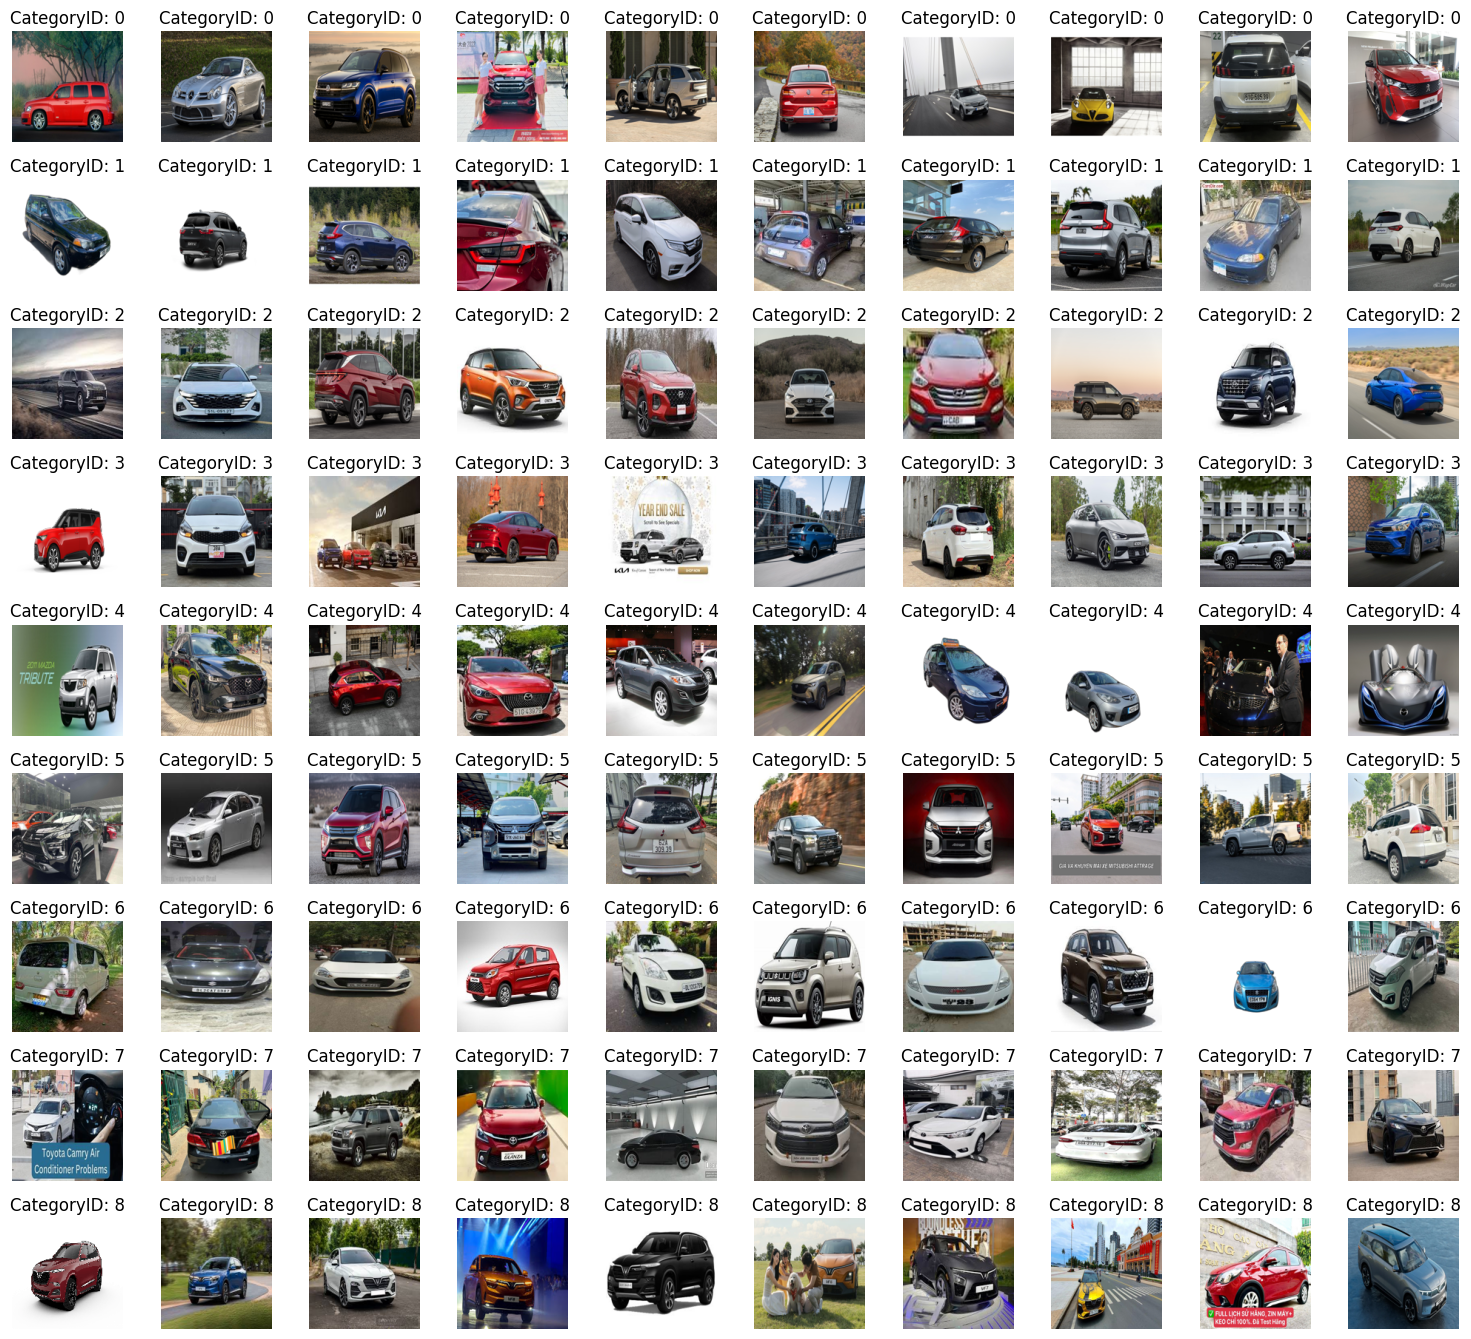

In [19]:
def Viz_clustered_data(path):
    df = pd.read_csv(path)
    grouped = df.groupby('label')

    NumImgsPerRow = 10
    ImgHeight = ImgWidth = 150

    fig, axes = plt.subplots(nrows=len(grouped), ncols=NumImgsPerRow, figsize=(NumImgsPerRow * 1.5, len(grouped) * 1.5))

    if len(grouped) > 1:
        for idx, (label, group) in enumerate(grouped):
            # Chọn ngẫu nhiên ảnh từ mỗi nhóm
            sample_images = group.sample(n=NumImgsPerRow, random_state=42).reset_index(drop=True)

            for j, (index, row) in enumerate(sample_images.iterrows()):
                img_path = row['path']
                img = Image.open(img_path).resize((ImgWidth, ImgHeight))

                ax = axes[idx, j]
                ax.imshow(img)
                ax.set_title(f'ClusterID: {label}')
                ax.axis('off')

    plt.tight_layout()
    plt.show()

Viz_data('/kaggle/working/clustered_data.csv')